# Clasificación Binaria

## Clasificación por nivel de experiencia

### 1. La variable 'experience_level' clasifica a los empleados en:
   
- EN: Entry-level (nivel de entrada)
- MI: Mid-level (nivel medio)
- SE: Seniorv (mas que medio)
- EX: Executive (alta dirección)

### 2. Clasificación binaria:

Grupo 0: EN y MI → poca o mediana experiencia
Grupo 1: SE y EX → mucha experiencia

### 3. ¿Para qué sirve?
   
Este modelo permite predecir si un perfil es de alta experiencia, basándose en variables como:
- employment_type (tipo de contrato)
- job_title o job_group (tipo de cargo)
- company_size (tamaño de empresa)
- remote_ratio o is_remote (nivel de trabajo remoto)
- company_location y employee_residence (ubicación)
- salary_in_usd 
  
### 4. Aplicación real:
- Sistemas de recomendación de empleo
- Clasificación automática de candidatos por experiencia

### ✅ Tipos de datos con los que funciona mejor la regresión logística

#### 1. Variables predictoras numéricas (escaladas)

Ejemplos: edad, ingresos, años de experiencia, calificaciones

Por qué funcionan bien: la regresión logística modela una función lineal sobre estas variables; si están escaladas, el modelo converge más rápido y es más estable.

#### 2. Variables categóricas (codificadas en One-Hot o similar)

Ejemplos: tipo de contrato, sector, ubicación, tamaño de empresa

-  Importante: deben estar codificadas en valores numéricos. Lo ideal es usar:

- OneHotEncoder para variables sin orden lógico

- OrdinalEncoder si hay un orden entre las categorías

#### 3. Variables sin multicolinealidad alta
Si hay alta correlación entre variables, el modelo puede volverse inestable. Se recomienda eliminar o combinar variables redundantes.

#### 4. Datos sin muchos valores atípicos extremos
Valores extremos pueden afectar negativamente los coeficientes. Puede ser útil usar transformaciones como logaritmos o aplicar técnicas de detección de outliers.

**⚠️ Evitar usar con...**
Relaciones no lineales complejas: la regresión logística no captura bien patrones no lineales (usa modelos como árboles, redes o SVM en ese caso).

Variables con muchas clases en categóricas: pueden generar demasiadas columnas si haces One-Hot, volviendo el modelo más complejo e ineficiente.

**🎯 Recomendaciones prácticas**
* Escala los datos numéricos: con StandardScaler o MinMaxScaler.
* Codifica los datos categóricos: con OneHotEncoder o similar.
* Evita multicolinealidad: con df.corr() o VIF para detectar redundancia.
* Normaliza la variable objetivo: debe ser binaria (0/1) para regresión logística clásica.




## 1. Importar librerías

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.compose import make_column_transformer

## 2. Data 
*Para este contexto se utilizara la data preprocesada 3*

In [4]:
data= pd.read_csv(r"C:\Users\darly\OneDrive\Escritorio\IA_explorer2\dataSet\data_preprocesada_3.csv")

*Añadir la columna que se quiere predecir, transformarla a etiquetas binarias*

In [6]:
data["experience_group"] = data["experience_level"].map({"EN": 0, "MI": 0, "SE": 1, "EX": 1})

In [7]:
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_clean,employee_residence_clean,company_location_clean,log_salary_usd,remote_type,experience_group
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Data Scientist,DE,DE,11.287705,Presencial,0
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Other,Other,Other,12.468441,Presencial,1
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Other,GB,GB,11.599332,Híbrido,1
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Other,Other,Other,9.903538,Presencial,0
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Machine Learning Engineer,US,US,11.918397,Híbrido,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,Data Engineer,US,US,11.944714,Remoto Total,1
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,Data Engineer,US,US,11.744045,Remoto Total,1
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,Data Analyst,US,US,11.767575,Presencial,1
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,Data Analyst,US,US,11.918397,Remoto Total,1


*Revisar el balance de las clases*

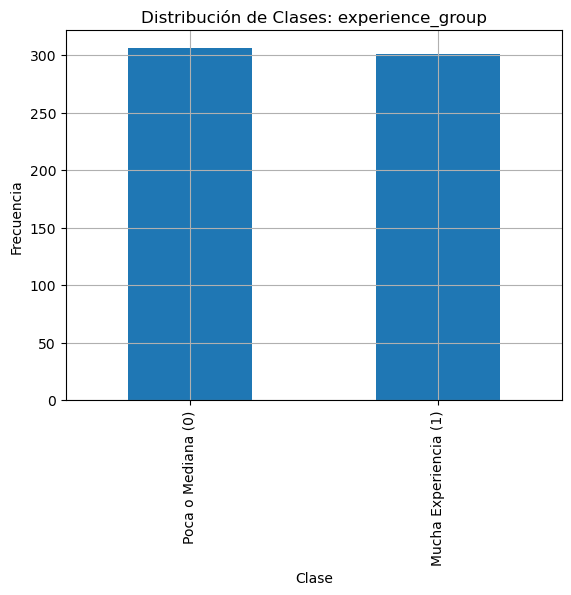

Conteo por clase:
 experience_group
1    306
0    301
Name: count, dtype: int64

Proporciones:
 experience_group
1    0.504119
0    0.495881
Name: proportion, dtype: float64


In [19]:
# Revisar el balance de clases

# Conteo de clases
data["experience_group"].value_counts().plot(kind='bar')
plt.title("Distribución de Clases: experience_group")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.xticks(ticks=[0, 1], labels=["Poca o Mediana (0)", "Mucha Experiencia (1)"])
plt.grid(True)
plt.show()

# imprimir los valores absolutos y proporciones
print("Conteo por clase:\n", data["experience_group"].value_counts())
print("\nProporciones:\n", data["experience_group"].value_counts(normalize=True))


## 3. Transformar, modelar

*Seleccionar caracteristicas*

In [21]:
features = ["work_year", "remote_ratio", "salary_in_usd"]
X = data[features]
y = data["experience_group"]

*Transformar datos*  **--> normalizarlos**

In [35]:
preprocessor = make_column_transformer((StandardScaler(), features))

*Aplicar tUberias*

In [36]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),           # Escalado y codificación
    ("classifier", LogisticRegression())      # Modelo
])

*partir datos*

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*entrenar la tuberia y predecir*

In [40]:
# Entrenar el modelo
pipeline.fit(X_train, y_train)
    
# predecir
y_pred = pipeline.predict(X_test)


## 4. Evaluar modelo

In [43]:
# Evaluación
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Matriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)
print("\nExactitud del modelo:", accuracy)

Matriz de Confusión:
 [[49 14]
 [17 42]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        63
           1       0.75      0.71      0.73        59

    accuracy                           0.75       122
   macro avg       0.75      0.74      0.75       122
weighted avg       0.75      0.75      0.75       122


Exactitud del modelo: 0.7459016393442623


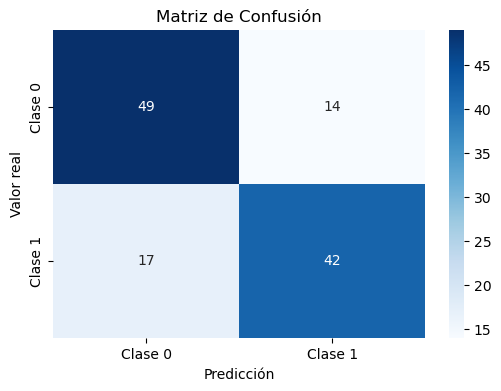

In [42]:

# Graficar
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión")
plt.show()
